In [34]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 

In [6]:
pd.set_option("max_rows", 10) # max de ligne imprimer 
pd.set_option("max_columns",10) # nombre de ligne à afficher 
pd.set_option("precision", 5) # nombre de chiffre significatif des valeurs apres la virgule
pd.set_option("colheader_justify", "center")# pour centrer les variables 

In [4]:
filepath_or_buffer = "ParisHousing.csv"

table = pd.read_csv(filepath_or_buffer, sep=',', delimiter=None, header='infer',
names=None, index_col=None, usecols=None)

In [7]:
table.head(10)

,Unnamed: 0,squareMeters,numberOfRooms,floors,cityCode,...,hasStorageRoom,hasGuestRoom,price,category,PoolAndYard
0,0,75523,three,63,9373,...,False,7,7559081.5,Basic,has pool and no yard
1,1,80771,thirty-nine,98,39381,...,True,2,8085989.5,Luxury,has pool and has yard
2,2,55712,fifty-eight,19,34457,...,True,9,5574642.1,Basic,has pool and no yard
3,3,32316,forty-seven,6,27939,...,False,3,3232561.2,Basic,no pool and no yard
4,4,70429,nineteen,90,38045,...,True,4,7055052.0,Luxury,has pool and has yard
5,5,39223,thirty-six,17,39489,...,False,1,3926647.2,Basic,has pool and no yard
6,6,58682,ten,99,6450,...,False,5,5876376.5,Luxury,has pool and has yard
7,7,86929,one hundred,11,98155,...,False,10,8696869.3,Basic,no pool and has yard
8,8,51522,three,61,9047,...,True,5,5154055.2,Basic,no pool and no yard
9,9,39686,forty-two,15,71019,...,True,3,3970892.1,Basic,no pool and no yard


In [8]:
table.ndim # permet de savoir si on a une dataframe ou une serie si =1 serie , =2 dataframe 

2

In [9]:
print("les dimensions de notre dataframe sont de :", table.shape)

les dimensions de notre dataframe sont de : (10000, 18)


In [10]:
table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         10000 non-null  int64  
 1   squareMeters       10000 non-null  int64  
 2   numberOfRooms      10000 non-null  object 
 3   floors             10000 non-null  int64  
 4   cityCode           10000 non-null  int64  
 5   cityPartRange      10000 non-null  int64  
 6   numPrevOwners      10000 non-null  int64  
 7   made               10000 non-null  int64  
 8   isNewBuilt         10000 non-null  bool   
 9   hasStormProtector  10000 non-null  bool   
 10  basement           10000 non-null  int64  
 11  attic              10000 non-null  int64  
 12  garage             10000 non-null  int64  
 13  hasStorageRoom     10000 non-null  bool   
 14  hasGuestRoom       10000 non-null  int64  
 15  price              10000 non-null  float64
 16  category           1000

In [11]:
table.index

RangeIndex(start=0, stop=10000, step=1)

In [12]:
# Duplicate Label Detection¶
table.columns.is_unique

True

In [13]:
table.index.is_unique

True

In [15]:
# pour supprimer les doublons s'il y en a
table.loc[~table.index.duplicated(), :]

,Unnamed: 0,squareMeters,numberOfRooms,floors,cityCode,...,hasStorageRoom,hasGuestRoom,price,category,PoolAndYard
0,0,75523,three,63,9373,...,False,7,7559081.5,Basic,has pool and no yard
1,1,80771,thirty-nine,98,39381,...,True,2,8085989.5,Luxury,has pool and has yard
2,2,55712,fifty-eight,19,34457,...,True,9,5574642.1,Basic,has pool and no yard
3,3,32316,forty-seven,6,27939,...,False,3,3232561.2,Basic,no pool and no yard
4,4,70429,nineteen,90,38045,...,True,4,7055052.0,Luxury,has pool and has yard
...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,1726,eighty-nine,5,73133,...,False,4,176425.9,Basic,has pool and no yard
9996,9996,44403,twenty-nine,12,34606,...,False,0,4448474.0,Basic,has pool and has yard
9997,9997,83841,three,69,80933,...,True,9,8390030.5,Basic,no pool and no yard
9998,9998,59036,seventy,96,55856,...,True,4,5905107.0,Basic,no pool and no yard


In [18]:
#Commençons par les valeurs manquantes :

def na(df):
    # na_total = df.isnull().sum().sort_values(ascending = False)
    na_pourcentage = df.isnull().sum().sort_values(ascending = False)/len(df)*100
    return na_pourcentage

In [19]:
na(table)

Unnamed: 0       0.0
squareMeters     0.0
category         0.0
price            0.0
hasGuestRoom     0.0
                ... 
cityPartRange    0.0
cityCode         0.0
floors           0.0
numberOfRooms    0.0
PoolAndYard      0.0
Length: 18, dtype: float64

In [20]:
table.isnull().sum().nlargest(1) #colonnes avec le plus grand nombre de données manquant

Unnamed: 0    0
dtype: int64

## Valeurs Aberantes

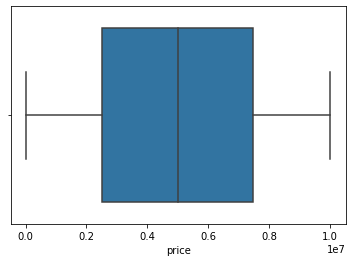

In [37]:
sns.boxplot(x=table['price']);
# plt.show;

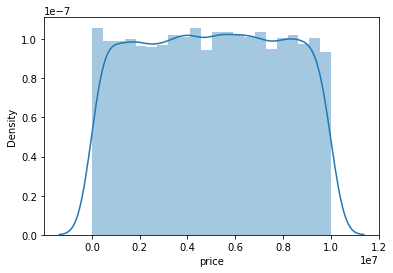

In [22]:
#On cherche à savoir si la variable est symétrique ou pas
sns.distplot(table['price'])
plt.show;

## Data Visualisation

In [23]:
### CENTRER LES GRAPHIQUES
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

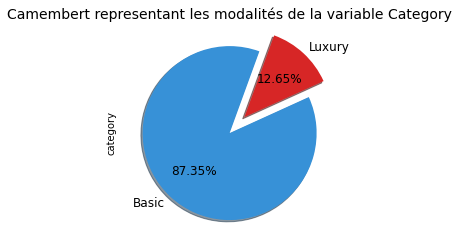

In [39]:
#Création d'un camembert de la variable Category pour les 2 modalités : Basic et Luxury
plt.title("Camembert representant les modalités de la variable Category", fontsize=14)
labels ="Basic", "Luxury"
colors = ["#3791D7", "#D72626"]
table["category"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', shadow=True, 
                                          colors=colors, labels=labels, fontsize=12, startangle=70);


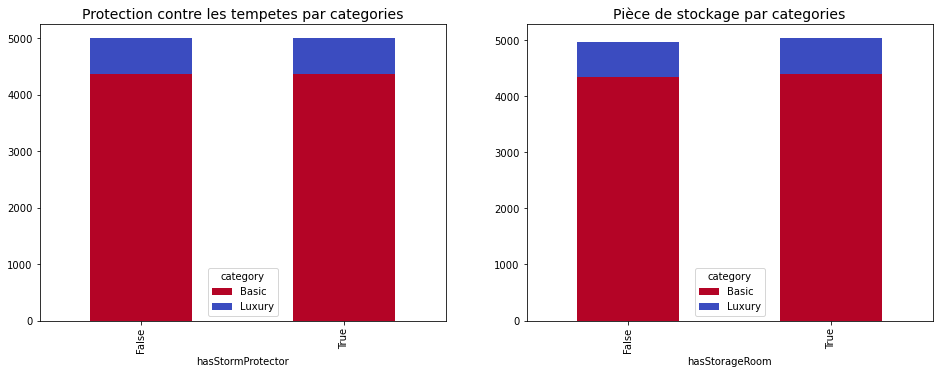

In [40]:
fig = plt.figure(figsize=(16,12)) 
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

cmap = plt.cm.coolwarm_r

loans_by_region = table.groupby(['hasStormProtector', 'category']).size()
loans_by_region.unstack().plot(kind='bar', stacked=True, colormap=cmap, ax=ax1, grid=False)
ax1.set_title('Protection contre les tempetes par categories', fontsize=14)

loans_by_grade = table.groupby(['hasStorageRoom', 'category']).size()
loans_by_grade.unstack().plot(kind='bar', stacked=True, colormap=cmap, ax=ax2, grid=False)
ax2.set_title('Pièce de stockage par categories', fontsize=14);

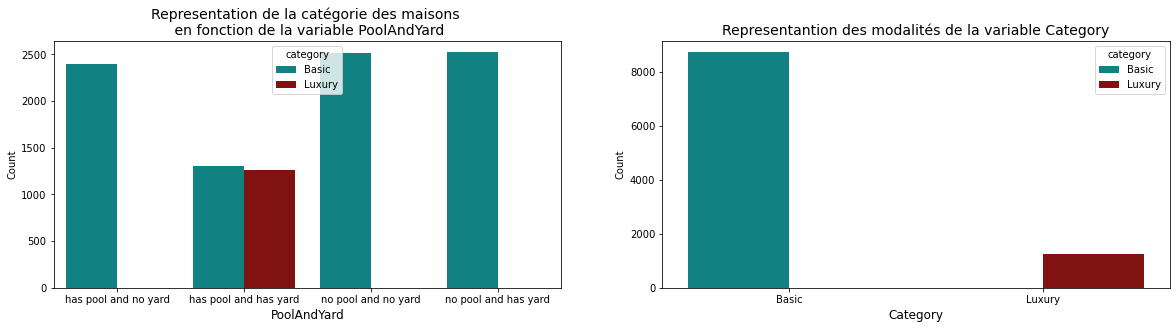

In [46]:
from scipy.stats import norm

plt.figure(figsize=(20,10))

palette = ['#009393', '#930000']
plt.subplot(221)
ax = sns.countplot(x='PoolAndYard', data=table, 
                  palette=palette, hue='category')

ax.set_title('Representation de la catégorie des maisons \n en fonction de la variable PoolAndYard', fontsize=14)
ax.set_xlabel('PoolAndYard', fontsize=12)
ax.set_ylabel('Count')

plt.subplot(222)
ax1 = sns.countplot(x='category', data=table, 
                   palette=palette, hue='category')

ax1.set_title('Representantion des modalités de la variable Category', fontsize=14)
ax1.set_xlabel('Category', fontsize=12)
ax1.set_ylabel('Count')  


low = table['PoolAndYard'].loc[table['category'] == 'Basic'].values
high = table['PoolAndYard'].loc[table['category'] == 'Luxury'].values



# Statistiques descriptives

In [29]:
table.describe() # description des valeurs numériques 

,Unnamed: 0,squareMeters,floors,cityCode,cityPartRange,...,basement,attic,garage,hasGuestRoom,price
count,10000.00000,10000.00000,10000.00000,10000.0000,10000.00000,...,10000.00000,10000.00000,10000.00000,10000.00000,1.00000e+04
mean,4999.50000,49870.13120,50.27630,50225.4861,5.51010,...,5033.10390,5028.01060,553.12120,4.99460,4.99345e+06
std,2886.89568,28774.37535,28.88917,29006.6758,2.87202,...,2876.72954,2894.33221,262.05017,3.17641,2.87742e+06
min,0.00000,89.00000,1.00000,3.0000,1.00000,...,0.00000,1.00000,100.00000,0.00000,1.03135e+04
25%,2499.75000,25098.50000,25.00000,24693.7500,3.00000,...,2559.75000,2512.00000,327.75000,2.00000,2.51640e+06
50%,4999.50000,50105.50000,50.00000,50693.0000,5.00000,...,5092.50000,5045.00000,554.00000,5.00000,5.01618e+06
75%,7499.25000,74609.75000,76.00000,75683.2500,8.00000,...,7511.25000,7540.50000,777.25000,8.00000,7.46909e+06
max,9999.00000,99999.00000,100.00000,99953.0000,10.00000,...,10000.00000,10000.00000,1000.00000,10.00000,1.00068e+07


In [49]:
var_cate = [col for col in table.columns if table[col].dtype=='O']

print("Les variables catégorielles de la DataFrame sont : ", var_cate)

Les variables catégorielles de la DataFrame sont :  ['numberOfRooms', 'category', 'PoolAndYard']


In [50]:
for col in var_cate:
    
    print(f"La variable {col} contient {table[col].nunique()} modalités") 

La variable numberOfRooms contient 100 modalités
La variable category contient 2 modalités
La variable PoolAndYard contient 4 modalités


In [51]:
table.describe(include=['object']) # description des objects 

,numberOfRooms,category,PoolAndYard
count,10000,10000,10000
unique,100,2,4
top,fifty-four,Basic,has pool and has yard
freq,129,8735,2566


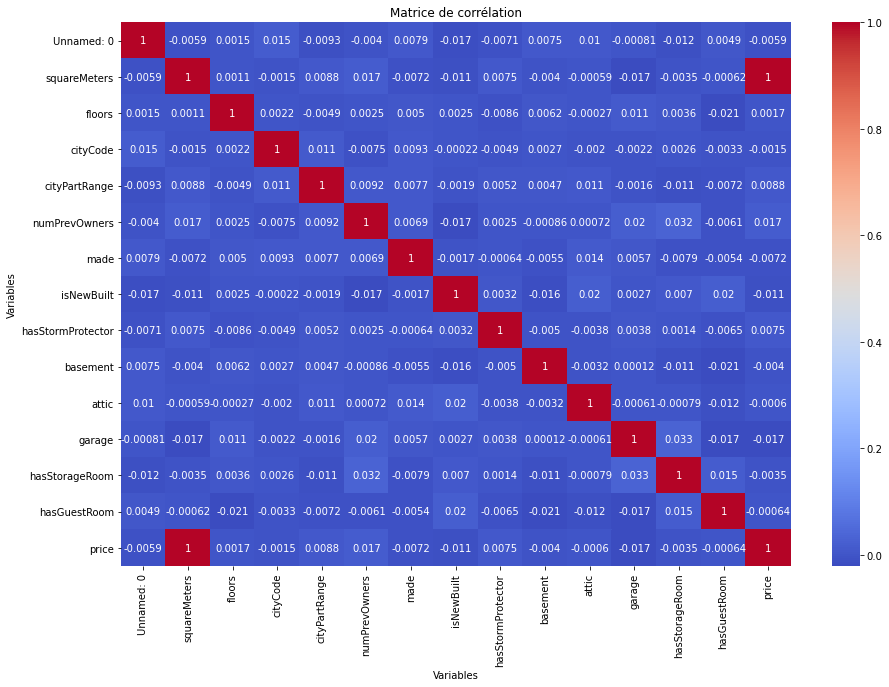

In [53]:
plt.subplots(figsize=(15, 10));
sns.heatmap(table.corr(), annot = True, cmap = "coolwarm");
plt.title("Matrice de corrélation")
plt.xlabel("Variables")
plt.ylabel("Variables");

### Encodage de certaines variables

In [54]:
# Traitement de la varible numberOfRooms

def parse_int(textnum, numwords={}):
    # create our default word-lists
    if not numwords:

      # singles
      units = [
        "zero", "one", "two", "three", "four", "five", "six", "seven", "eight",
        "nine", "ten", "eleven", "twelve", "thirteen", "fourteen", "fifteen",
        "sixteen", "seventeen", "eighteen", "nineteen",
      ]

      # tens
      tens = ["", "", "twenty", "thirty", "forty", "fifty", "sixty", "seventy", "eighty", "ninety"]

      # larger scales
      scales = ["hundred", "thousand", "million", "billion", "trillion"]

      # divisors
      numwords["and"] = (1, 0)

      # perform our loops and start the swap
      for idx, word in enumerate(units):    numwords[word] = (1, idx)
      for idx, word in enumerate(tens):     numwords[word] = (1, idx * 10)
      for idx, word in enumerate(scales):   numwords[word] = (10 ** (idx * 3 or 2), 0)

    # primary loop
    current = result = 0
    # loop while splitting to break into individual words
    for word in textnum.replace("-"," ").split():
        # if problem then fail-safe
        if word not in numwords:
          raise Exception("Illegal word: " + word)

        # use the index by the multiplier
        scale, increment = numwords[word]
        current = current * scale + increment
       
        # if larger than 100 then push for a round 2
        if scale > 100:
            result += current
            current = 0

    # return the result plus the current
    return result + current

In [55]:
a = []
for i in table['numberOfRooms']:
    a.append(parse_int(i, numwords={}))
print(a)

[3, 39, 58, 47, 19, 36, 10, 100, 3, 42, 21, 74, 31, 44, 3, 60, 88, 31, 37, 43, 64, 12, 64, 47, 51, 56, 46, 72, 43, 7, 98, 40, 78, 89, 47, 29, 87, 8, 88, 27, 19, 59, 29, 39, 38, 49, 66, 22, 97, 47, 25, 10, 52, 11, 29, 6, 89, 82, 8, 60, 60, 17, 57, 66, 74, 9, 15, 27, 48, 74, 5, 48, 43, 28, 20, 52, 60, 67, 99, 73, 50, 69, 31, 46, 43, 4, 75, 100, 74, 37, 61, 20, 29, 64, 55, 64, 60, 36, 9, 19, 92, 23, 49, 72, 59, 93, 73, 71, 35, 71, 94, 24, 81, 91, 15, 57, 77, 50, 29, 15, 68, 70, 54, 12, 44, 45, 20, 63, 84, 81, 40, 34, 76, 66, 96, 63, 94, 69, 1, 66, 25, 47, 21, 50, 46, 51, 19, 82, 56, 22, 21, 35, 22, 45, 64, 17, 47, 90, 37, 98, 98, 95, 73, 49, 95, 18, 84, 10, 22, 2, 28, 53, 88, 64, 64, 98, 4, 48, 75, 100, 98, 97, 100, 91, 9, 72, 69, 41, 59, 37, 84, 38, 26, 49, 46, 60, 57, 76, 77, 93, 36, 3, 38, 16, 40, 38, 34, 12, 43, 47, 13, 5, 95, 7, 88, 42, 18, 72, 21, 96, 67, 34, 11, 41, 52, 20, 76, 71, 22, 84, 99, 5, 95, 65, 83, 96, 62, 65, 41, 62, 43, 67, 48, 87, 95, 79, 78, 36, 94, 31, 78, 65, 65, 41

In [56]:
table["numberOfRooms"]=a

In [57]:
#Encodage de la target:Category
bin_encoding1 = {'Basic':0, 'Luxury':1}
table['category'] = table['category'].map(bin_encoding1)

In [58]:
#Encodage de la variable:hasStormProtector
table=table.replace(False, 0)
table=table.replace(True, 1)

### Suppression des varibles fortement correlés entre elles et les varaibles jugées non pertinentes
- price vs squareMeters
- hasStormProtector vs hasStorageRoom
- cityCode; numPrevOwners; made ; Unnamed: 0

In [59]:
table.drop(["squareMeters", "hasStorageRoom", "cityCode", "numPrevOwners",  "made", "Unnamed: 0"], axis=1, inplace=True)

## One Hot Encoding de la varible PoolAndYard

In [60]:
var_OHE = [col for col in table.columns if table[col].dtype=='O']

print("Les variables catégorielles de la DataFrame sont : ", var_OHE)

Les variables catégorielles de la DataFrame sont :  ['PoolAndYard']


In [61]:
for col in var_OHE:
    table = pd.get_dummies(table, columns = [col], prefix=col+'_')

In [62]:
table

,numberOfRooms,floors,cityPartRange,isNewBuilt,hasStormProtector,...,category,PoolAndYard__has pool and has yard,PoolAndYard__has pool and no yard,PoolAndYard__no pool and has yard,PoolAndYard__no pool and no yard
0,3,63,3,0,1,...,0,0,1,0,0
1,39,98,8,1,0,...,1,1,0,0,0
2,58,19,6,0,0,...,0,0,1,0,0
3,47,6,10,0,1,...,0,0,0,0,1
4,19,90,3,1,0,...,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,89,5,7,0,1,...,0,0,1,0,0
9996,29,12,9,0,1,...,0,1,0,0,0
9997,3,69,10,1,1,...,0,0,0,0,1
9998,70,96,1,0,1,...,0,0,0,0,1
